In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import pingouin as pg
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.api import qqplot
from statsmodels.formula.api import logit
from statsmodels.graphics.mosaicplot import mosaic

In [3]:
logit_df=pd.read_csv("churn.csv")

In [4]:
logit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   has_churned                400 non-null    int64  
 1   time_since_first_purchase  400 non-null    float64
 2   time_since_last_purchase   400 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [5]:
logit_df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
has_churned,400.0,0.500000,0.500626,0.000000,0.000000,0.500000,1.000000,1.000000
time_since_first_purchase,400.0,-0.034370,0.952936,-1.273770,-0.828377,-0.152072,0.544826,3.738312
time_since_last_purchase,400.0,0.144549,1.103133,-0.870666,-0.645824,-0.265036,0.571214,5.928242


In [6]:
print(logit_df.head(5))
#first ve last columnları coding yapılmış

   has_churned  time_since_first_purchase  time_since_last_purchase
0            0                  -1.089221                 -0.721322
1            0                   1.182983                  3.634435
2            0                  -0.846156                 -0.427582
3            0                   0.086942                 -0.535672
4            0                  -1.166642                 -0.672640


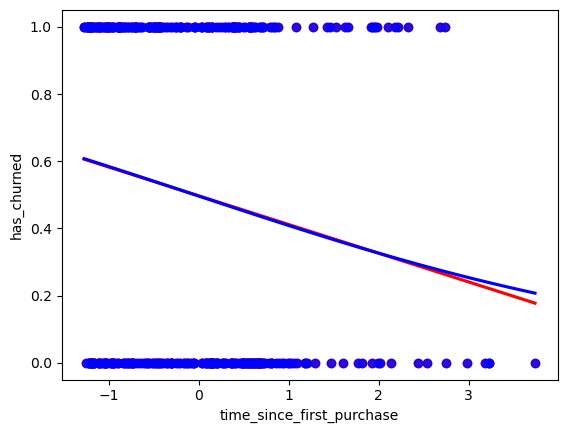

In [7]:
sns.regplot(x="time_since_first_purchase",y="has_churned",data=logit_df,ci=None,color="red")
sns.regplot(x="time_since_first_purchase",y="has_churned",data=logit_df,ci=None,color="blue",logistic=True)
plt.show()

In [8]:
logit_model=logit("has_churned ~ time_since_last_purchase",data=logit_df).fit()

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4


In [9]:
logit_model.params

Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64

In [10]:
explanatory_data = pd.DataFrame(  {"time_since_last_purchase": np.arange(-1, 6.25, 0.25)})
prediction_data = explanatory_data.assign(has_churned = logit_model.predict(explanatory_data))


In [11]:
print(prediction_data)
#has_churned 1 veya 0 olmalı ama küsüratlı

    time_since_last_purchase  has_churned
0                      -1.00     0.424523
1                      -0.75     0.441043
2                      -0.50     0.457695
3                      -0.25     0.474441
4                       0.00     0.491246
5                       0.25     0.508070
6                       0.50     0.524876
7                       0.75     0.541626
8                       1.00     0.558283
9                       1.25     0.574809
10                      1.50     0.591170
11                      1.75     0.607331
12                      2.00     0.623260
13                      2.25     0.638928
14                      2.50     0.654305
15                      2.75     0.669367
16                      3.00     0.684089
17                      3.25     0.698450
18                      3.50     0.712434
19                      3.75     0.726023
20                      4.00     0.739205
21                      4.25     0.751970
22                      4.50     0

In [12]:
prediction_data["predict_churned_round"]=np.round(prediction_data["has_churned"])

In [13]:
print(prediction_data)

    time_since_last_purchase  has_churned  predict_churned_round
0                      -1.00     0.424523                    0.0
1                      -0.75     0.441043                    0.0
2                      -0.50     0.457695                    0.0
3                      -0.25     0.474441                    0.0
4                       0.00     0.491246                    0.0
5                       0.25     0.508070                    1.0
6                       0.50     0.524876                    1.0
7                       0.75     0.541626                    1.0
8                       1.00     0.558283                    1.0
9                       1.25     0.574809                    1.0
10                      1.50     0.591170                    1.0
11                      1.75     0.607331                    1.0
12                      2.00     0.623260                    1.0
13                      2.25     0.638928                    1.0
14                      2

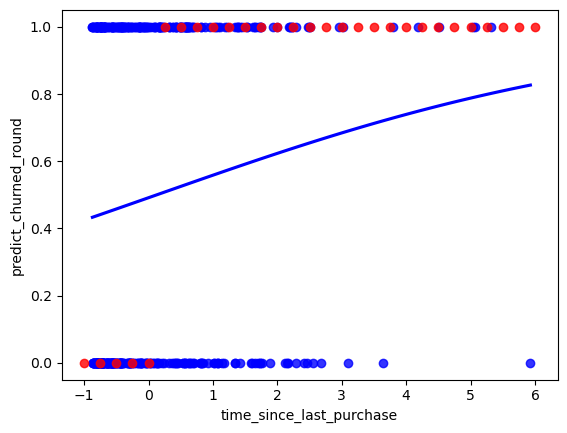

In [14]:
sns.regplot(x="time_since_last_purchase",y="has_churned",data=logit_df,ci=None,color="blue",logistic=True) #prediction ile real data karşılaştırma
sns.regplot(x="time_since_last_purchase",y="predict_churned_round",data=prediction_data,ci=None,color="red",logistic=True)
plt.show()

In [15]:
prediction_data["ihtimal"] = prediction_data["has_churned"] /(1 - prediction_data["has_churned"])


In [16]:
print(prediction_data)

    time_since_last_purchase  has_churned  predict_churned_round   ihtimal
0                      -1.00     0.424523                    0.0  0.737688
1                      -0.75     0.441043                    0.0  0.789046
2                      -0.50     0.457695                    0.0  0.843980
3                      -0.25     0.474441                    0.0  0.902738
4                       0.00     0.491246                    0.0  0.965587
5                       0.25     0.508070                    1.0  1.032811
6                       0.50     0.524876                    1.0  1.104716
7                       0.75     0.541626                    1.0  1.181626
8                       1.00     0.558283                    1.0  1.263892
9                       1.25     0.574809                    1.0  1.351884
10                      1.50     0.591170                    1.0  1.446003
11                      1.75     0.607331                    1.0  1.546674
12                      2

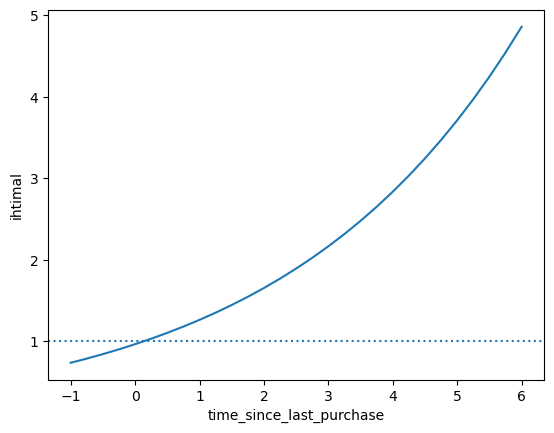

In [17]:
sns.lineplot(x="time_since_last_purchase",y="ihtimal",data=prediction_data)
plt.axhline(y=1,linestyle="dotted")
plt.show()


In [18]:
prediction_data["log_ihtimal"] = np.log(prediction_data["ihtimal"])

In [19]:
#Scale           Arevalueseasytointerpret?  Arechangeseasytointerpret?  Isprecise?
#Probability          ✔                         ✘                         ✔
#Mostlikelyoutcome    ✔✔                        ✔                        ✘
#Oddsratio            ✔                         ✘                         ✔
#Logoddsratio         ✘                         ✔                         ✔


In [20]:
print(prediction_data)

    time_since_last_purchase  has_churned  predict_churned_round   ihtimal  \
0                      -1.00     0.424523                    0.0  0.737688   
1                      -0.75     0.441043                    0.0  0.789046   
2                      -0.50     0.457695                    0.0  0.843980   
3                      -0.25     0.474441                    0.0  0.902738   
4                       0.00     0.491246                    0.0  0.965587   
5                       0.25     0.508070                    1.0  1.032811   
6                       0.50     0.524876                    1.0  1.104716   
7                       0.75     0.541626                    1.0  1.181626   
8                       1.00     0.558283                    1.0  1.263892   
9                       1.25     0.574809                    1.0  1.351884   
10                      1.50     0.591170                    1.0  1.446003   
11                      1.75     0.607331                    1.0

In [31]:
con_matrix=logit_model.pred_table(threshold=0.5)
#eğitim verisi üzerinde tahimn yapar
#parametreler
#threshold=0.5 parametresini 
#threshold Adjusts the cutoff for classifying predictions into positive or negative. A higher threshold results in fewer positive classifications.
#add_intercept: This parameter is used to determine whether an intercept should be added to the model. By default, this is usually set to True, but it might not be applicable depending on the context of your confusion matrix generation.

In [32]:
print(con_matrix)  

[[141.  59.]
 [111.  89.]]


 ## predict false and actualy false=141/// predictfalse and actualy true=111 ///predictfalse and actualy true =59 ///predict true and actualy true 89

(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.49751243781094534, 0.70265780730897),
  ('0', '1'): (0.0,
   0.7059800664451826,
   0.49751243781094534,
   0.2940199335548173),
  ('1', '0'): (0.5024875621890548,
   0.0,
   0.49751243781094534,
   0.553156146179402),
  ('1', '1'): (0.5024875621890548,
   0.5564784053156145,
   0.49751243781094534,
   0.4435215946843853)})

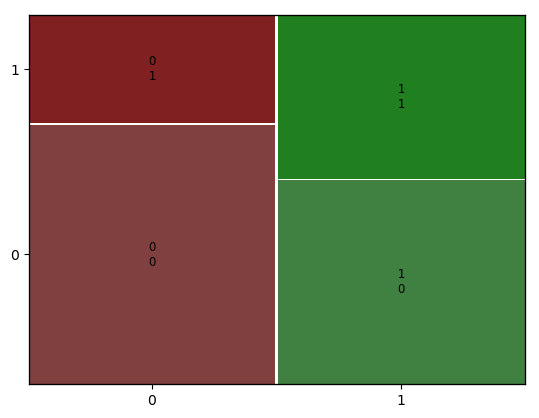

In [23]:
mosaic(con_matrix)

In [37]:
TN = con_matrix[0, 0]
FP = con_matrix[0, 1]
FN = con_matrix[1, 0]
TP = con_matrix[1, 1]

In [42]:
accuracy = (TN + TP) / (TN + FP + FN + TP)
sensitivty= TP/(FN+TP)#recall
specificity=TN/(FP+TN)

In [43]:
print(accuracy,sensitivty,specificity)

0.575 0.445 0.705


In [ ]:
#özgüllük artarsa hassasiyet azalır, tam terside geçerli